<a href="https://colab.research.google.com/github/Bhudevi-Vattikuti/Ai_internship_project/blob/main/coloridentification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import sklearn
import plotly.express as px
from sklearn.cluster import KMeans
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import cv2
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (10, 10
                                 ) 
plt.rcParams['axes.grid']=False
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']

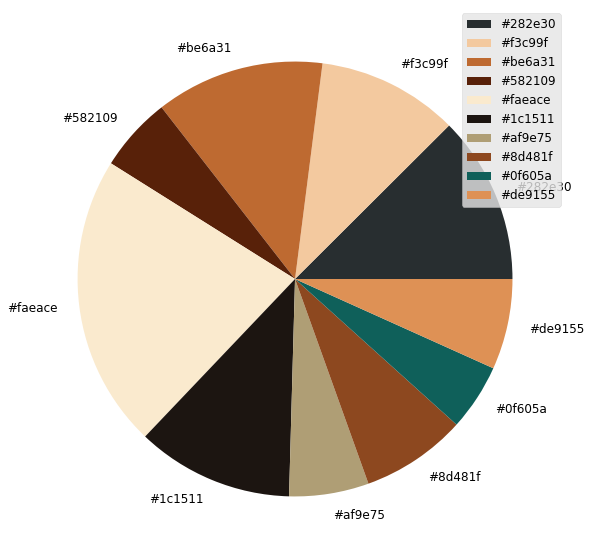

In [ ]:
def get_image(image_path):
    image = cv2.imread("/content/ACHI7982.jpg")
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))
image = get_image('inputimage.jpg')

number_of_colors = 10
modified_image = image.reshape(image.shape[0]*image.shape[1], 3)
clf = KMeans(n_clusters = number_of_colors)
labels = clf.fit_predict(modified_image)
counts = Counter(labels)

center_colors = clf.cluster_centers_
# We get ordered colors by iterating through the keys
ordered_colors = [center_colors[i] for i in counts.keys()]
hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
rgb_colors = [ordered_colors[i] for i in counts.keys()]
#plt.figure(figsize=(9,13))
#plt.title('Colors Detection ($n=10$)', fontsize=20)
plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
plt.legend()
plt.show()


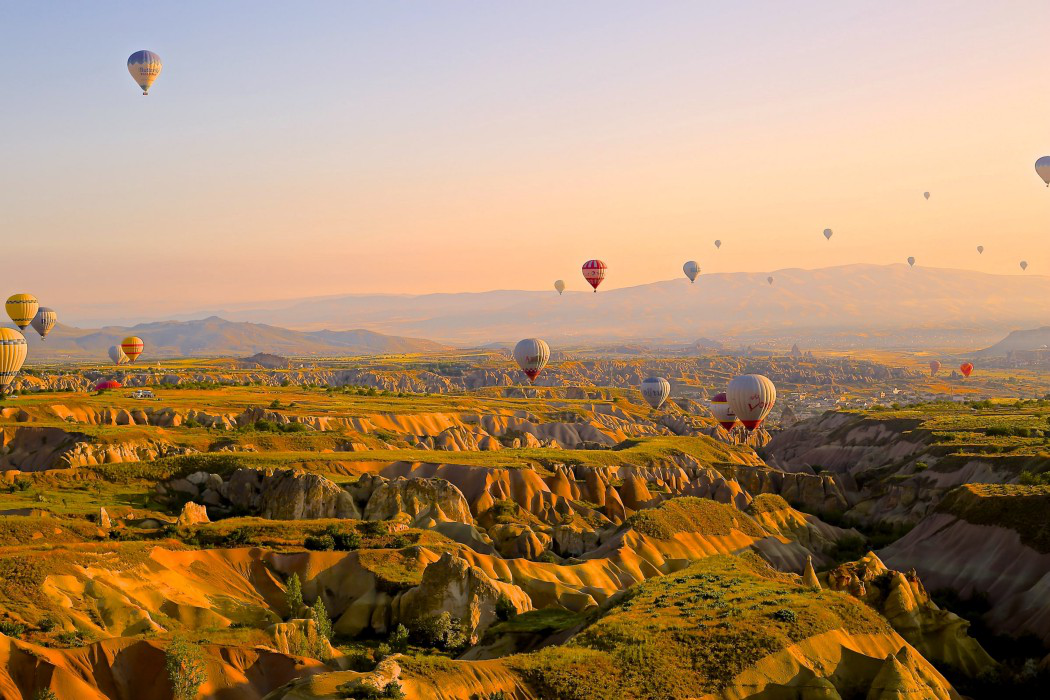

In [ ]:

from IPython.display import display
from PIL import Image

path="/content/pro img.jpeg"
display(Image.open(path))

In [ ]:
def inthreshold(array):
    count = 0
    for i in range(len(array)):
        if array[i]>=-12 and array[i]<=12:
            count=count+1
    return count

def show_color(col_index):
    color = col_index
    sub_image = (img_2-rgb_colors[color])
    ZEROS_VALUES = []
    COUNT = []
    for i in range(len(sub_image)):
        for j in range(len(sub_image[i])):
            e = sub_image[i,j]
            #print(e.shape)
            count = inthreshold(e)
            COUNT.append(count)
            if count==2:
                ZEROS_VALUES.append([i,j])
    color_arr=(np.zeros((16,16,3))+rgb_colors[color]).astype(int)
    normalized = sub_image - sub_image.min()
    normalized = ((sub_image/sub_image.max())*255).astype(int)
    ZEROS_IMAGE = img_2.copy()
    for i in range(len(ZEROS_VALUES)):
        ZEROS_IMAGE[ZEROS_VALUES[i][0],ZEROS_VALUES[i][1],:] = [250,250,250]
    plt.subplot(1,3,1)
    plt.imshow(ZEROS_IMAGE.astype(int))
    plt.subplot(1,3,2)
    plt.imshow(img_2)
    plt.subplot(1,3,3)
    #pwargs = {'interpolation':'nearest'}
    plt.imshow(color_arr)

In [ ]:
def show_color(col_index):
    color = col_index
    sub_image = (img_2-rgb_colors[color])
    ZEROS_VALUES = []
    COUNT = []
    for i in range(len(sub_image)):
        for j in range(len(sub_image[i])):
            e = sub_image[i,j]
            #print(e.shape)
            count = inthreshold(e)
            COUNT.append(count)
            if count==2:
                ZEROS_VALUES.append([i,j])
    color_arr=(np.zeros((16,16,3))+rgb_colors[color]).astype(int)
    normalized = sub_image - sub_image.min()
    normalized = ((sub_image/sub_image.max())*255).astype(int)
    ZEROS_IMAGE = img_2.copy()
    for i in range(len(ZEROS_VALUES)):
        ZEROS_IMAGE[ZEROS_VALUES[i][0],ZEROS_VALUES[i][1],:] = [250,250,250]
    plt.subplot(1,3,1)
    plt.imshow(ZEROS_IMAGE.astype(int))
    plt.subplot(1,3,2)
    plt.imshow(img_2)
    plt.subplot(1,3,3)
    #pwargs = {'interpolation':'nearest'}
    plt.imshow(color_arr)

In [ ]:
show_color(4)


NameError: ignored

In [ ]:
for i in range(len(rgb_colors)):
    rgb_colors[i] = rgb_colors[i].astype(int)

In [ ]:
def square_maker():
    inp_img = image
    h = int(inp_img.shape[0])
    step_h = int(h/10) 
    w = int(inp_img.shape[1])
    step_w = int(w/10) 
    X = np.arange(0,h+step_h,step_h)
    Y =np.arange(0,w+step_w,step_w)
    squares = [inp_img[0:step_h,0:step_w]]
    for i in range(0,len(X)-1):
        for j in range(0,len(Y)-1):
            squares.append(inp_img[X[i]:X[i+1],Y[j]:Y[j+1]])
    return np.array(squares)[1::]

In [ ]:
def color_computing(array):
    DIFF = []
    squared_image = square_maker()
    for square in squared_image:
        DIFF_COLOR = []
        for color in range(len(rgb_colors)):
            diff = np.abs(square - rgb_colors[color])
            DIFF_COLOR.append(diff.mean())
        DIFF.append(DIFF_COLOR)
    return np.array(DIFF)

In [ ]:
def best_color_plot(selected_slice):
    plt.subplot(1,2,1)
    plt.title('Retrieved Color')
    plt.imshow((np.zeros((16,16,3))+ rgb_colors[color_computing(image)[selected_slice].argmin()]).astype(int))
    plt.subplot(1,2,2)
    plt.title('Selected Square: '+ str(selected_slice))
    plt.imshow(square_maker()[selected_slice])
    


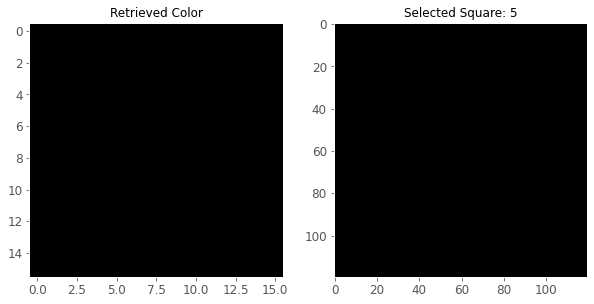

In [ ]:
best_color_plot(5)

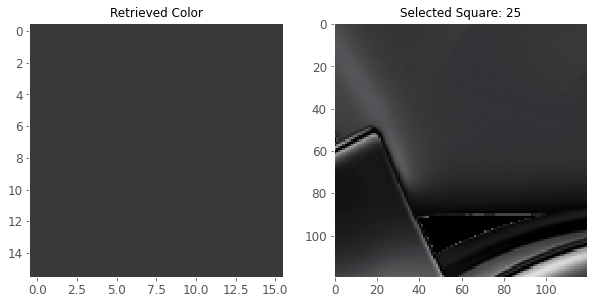

In [ ]:
best_color_plot(25)

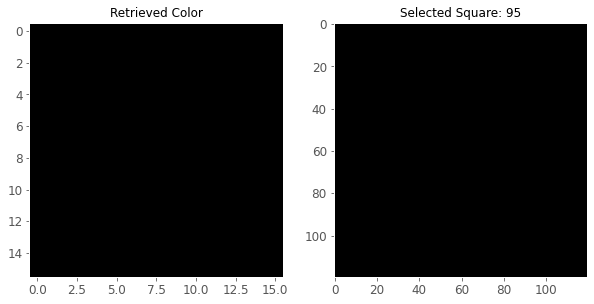

In [ ]:
best_color_plot(95)

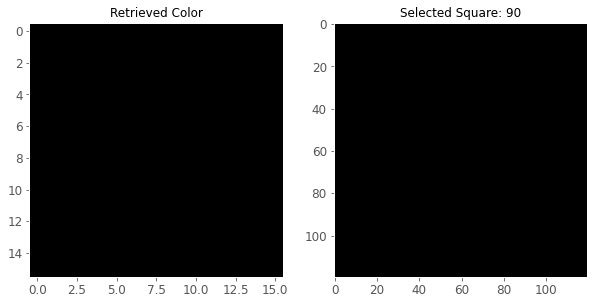

In [ ]:
best_color_plot(90)

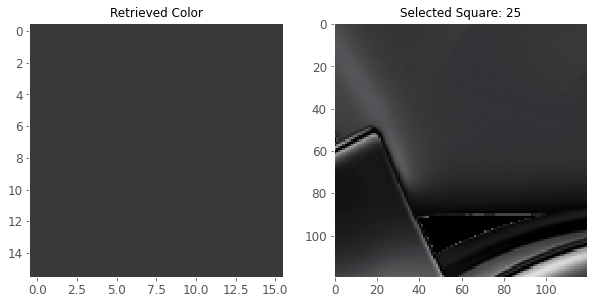

In [ ]:
best_color_plot(25)

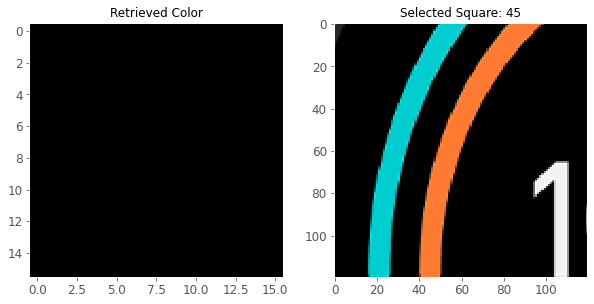

In [ ]:
best_color_plot(45)

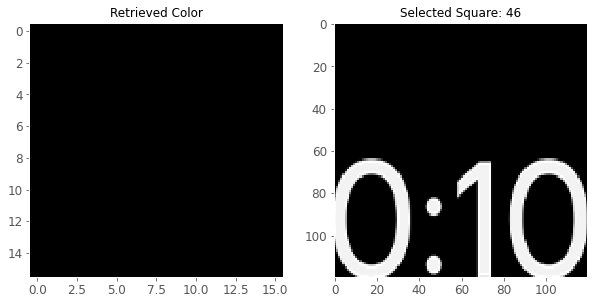

In [ ]:
best_color_plot(46)